In [173]:
metabolite = read.csv('./oplsda-vip1.5.csv')

In [88]:
name= metabolite$metabolites

In [89]:
length(name)

[1] 175

In [90]:
r = read.csv('/data/workdirV6/6.otu-metabolite-luming/KO.CLP.cor.r.csv',row.names = 1)

In [91]:
p = read.csv('/data/workdirV6/6.otu-metabolite-luming/KO.CLP.cor.p.csv',row.names = 1)

In [92]:
cmt = t(r[name,])

In [93]:
pmt = t(p[name,])

In [94]:
library(reshape2)

In [95]:
df <-melt(cmt,value.name= "cor")

In [96]:
df$pvalue <- as.vector(pmt)

In [97]:
if(!is.null(pmt)){
    ssmt <- pmt< 0.01
    pmt[ssmt] <- '**'
    smt <- pmt > 0.01& pmt < 0.05
    pmt[smt] <- '*'
    pmt[!ssmt&!smt]<- ''
    } else{
    pmt <- F
    }

In [98]:
library(pheatmap)

In [128]:
kind = c('g__Akkermansia_s__Akkermansia_muciniphila',
'g__Bacteroides_s__Bacteroides_caecimuris',
'g__Helicobacter_s__Helicobacter_hepaticus',
'g__Acutalibacter_s__Acutalibacter_muris',
'g__Lachnoclostridium_s__Lachnoclostridium_sp..YL32'
)

bad = c('g__Muribaculum_s__Muribaculum_sp..TLL.A4',
'g__Muribaculum_s__Muribaculum_sp..H5',
'g__Muribaculum_s__Muribaculum_intestinale',
'g__Duncaniella_s__Duncaniella_sp..B8',
'g__Lactobacillus_s__Lactobacillus_murinus'
)

In [129]:
dd = as.data.frame(c(kind,bad))

In [130]:
dd$type = c(rep('kind',5),rep('bad',5))

In [131]:
library(dplyr)

In [132]:
dd = dd %>% tibble::column_to_rownames(.,'c(kind, bad)')

In [133]:
dd

,type
,<chr>
g__Akkermansia_s__Akkermansia_muciniphila,kind
g__Bacteroides_s__Bacteroides_caecimuris,kind
g__Helicobacter_s__Helicobacter_hepaticus,kind
g__Acutalibacter_s__Acutalibacter_muris,kind
g__Lachnoclostridium_s__Lachnoclostridium_sp..YL32,kind
g__Muribaculum_s__Muribaculum_sp..TLL.A4,bad
g__Muribaculum_s__Muribaculum_sp..H5,bad
g__Muribaculum_s__Muribaculum_intestinale,bad
g__Duncaniella_s__Duncaniella_sp..B8,bad


In [134]:
cmt1 = cmt[,colSums(cmt == 0) < nrow(cmt)]

In [135]:
pmt1 = pmt[,colnames(cmt1)]

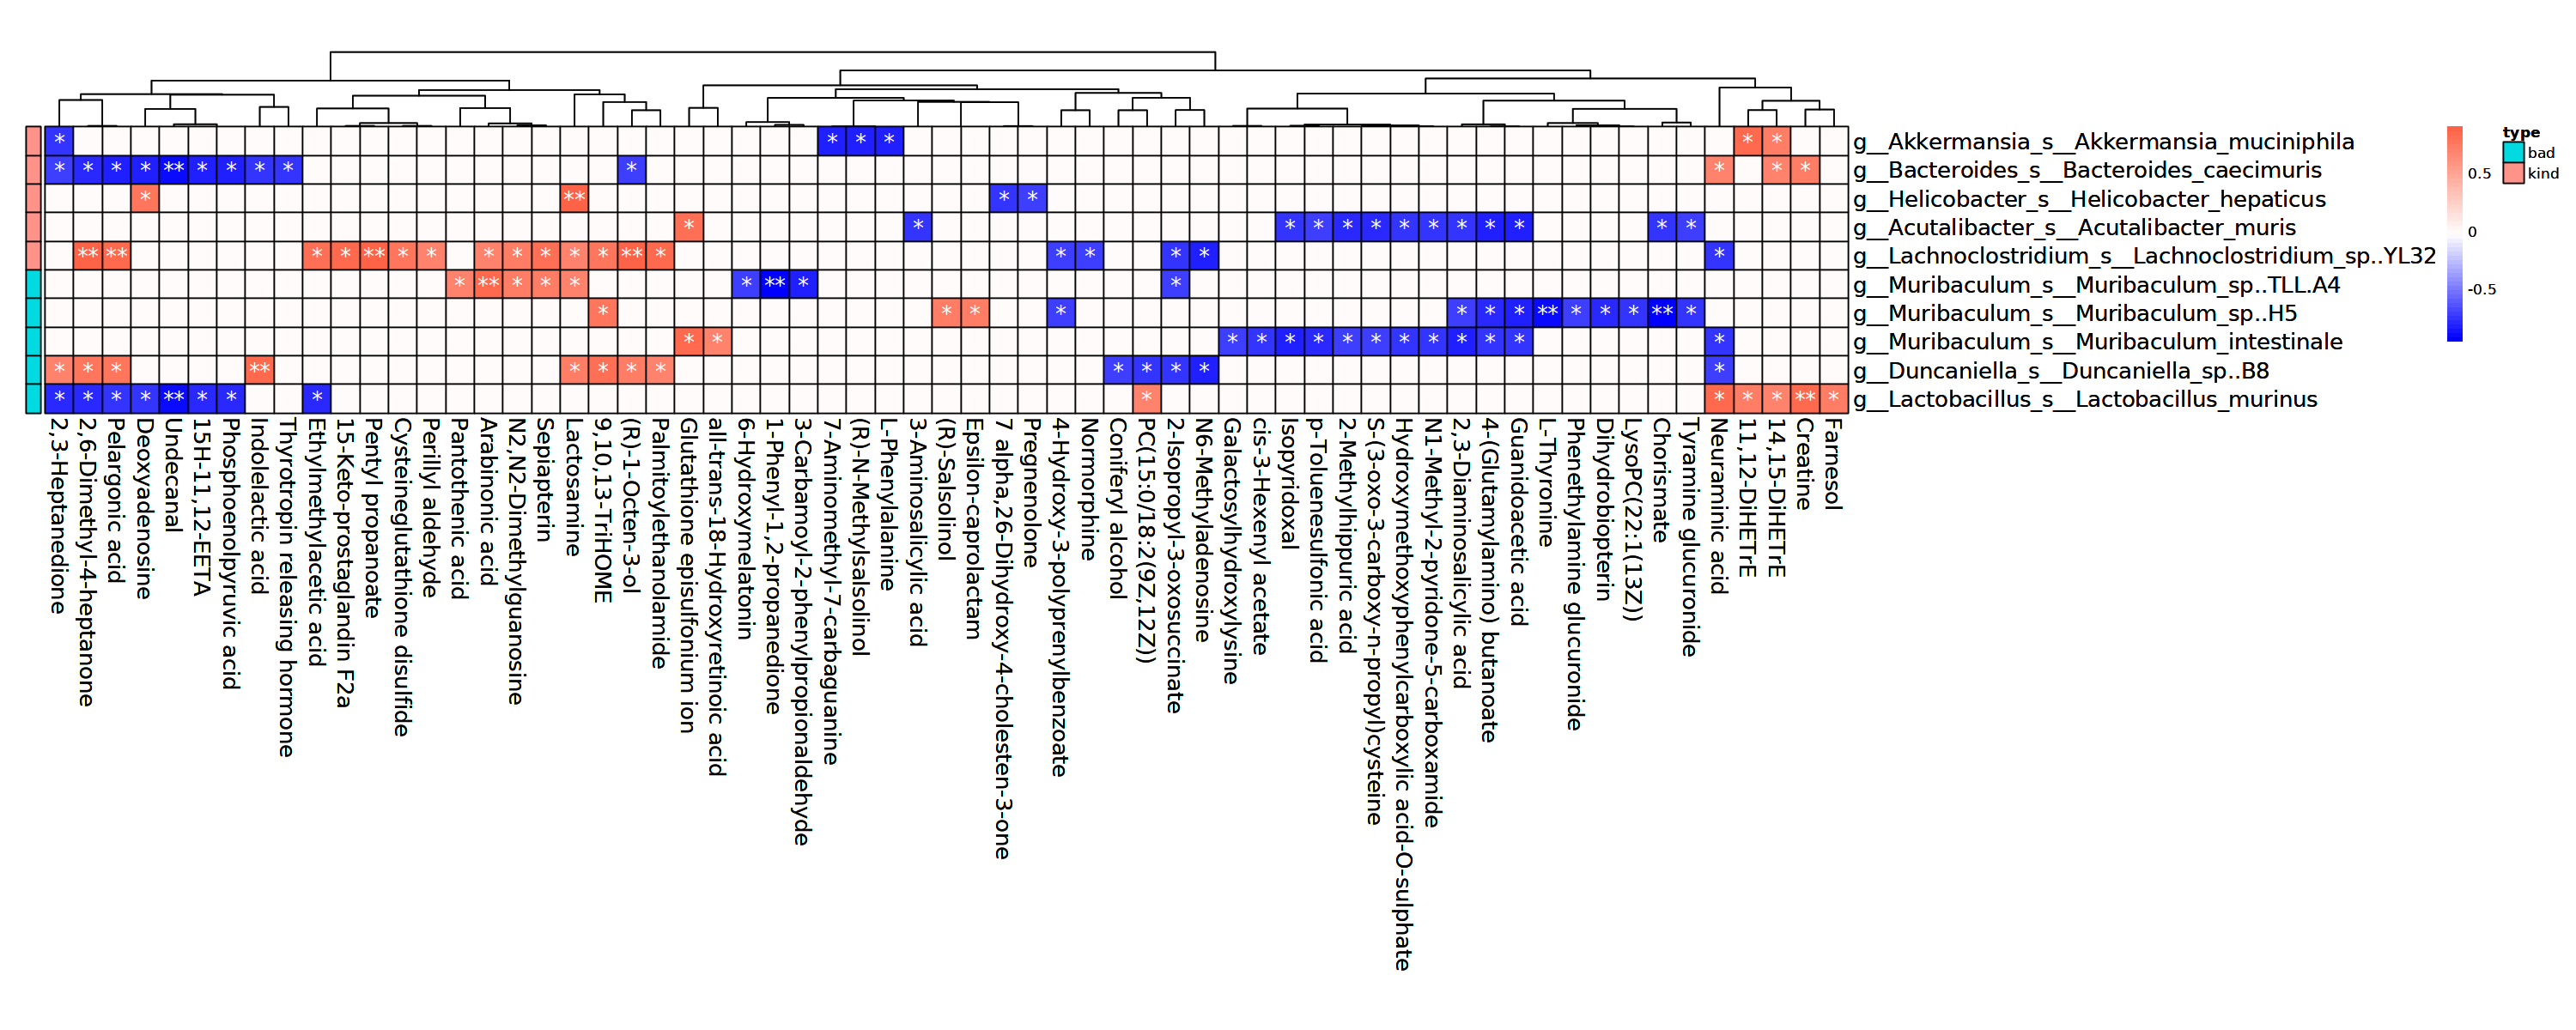

In [146]:
 mycol<-colorRampPalette(c("blue","white","tomato"))(50)
    options(repr.plot.height = 10,repr.plot.width = 25)
    p = pheatmap(cmt1,scale = "none",cluster_row = F, cluster_col = T, border='black',
    display_numbers = pmt1,fontsize_number = 15, number_color = "white", fontsize_row = 15,  fontsize_col = 15,annotation_names_row =F,
    cellwidth = 20, cellheight =20,color=mycol, annotation_row = dd )
    
    print(p)

In [147]:
pdf('koclpvswtclp-diffout-diffmetabolites.pdf',height = 10,width = 25)
print(p)
dev.off()

png 
  2

### kind

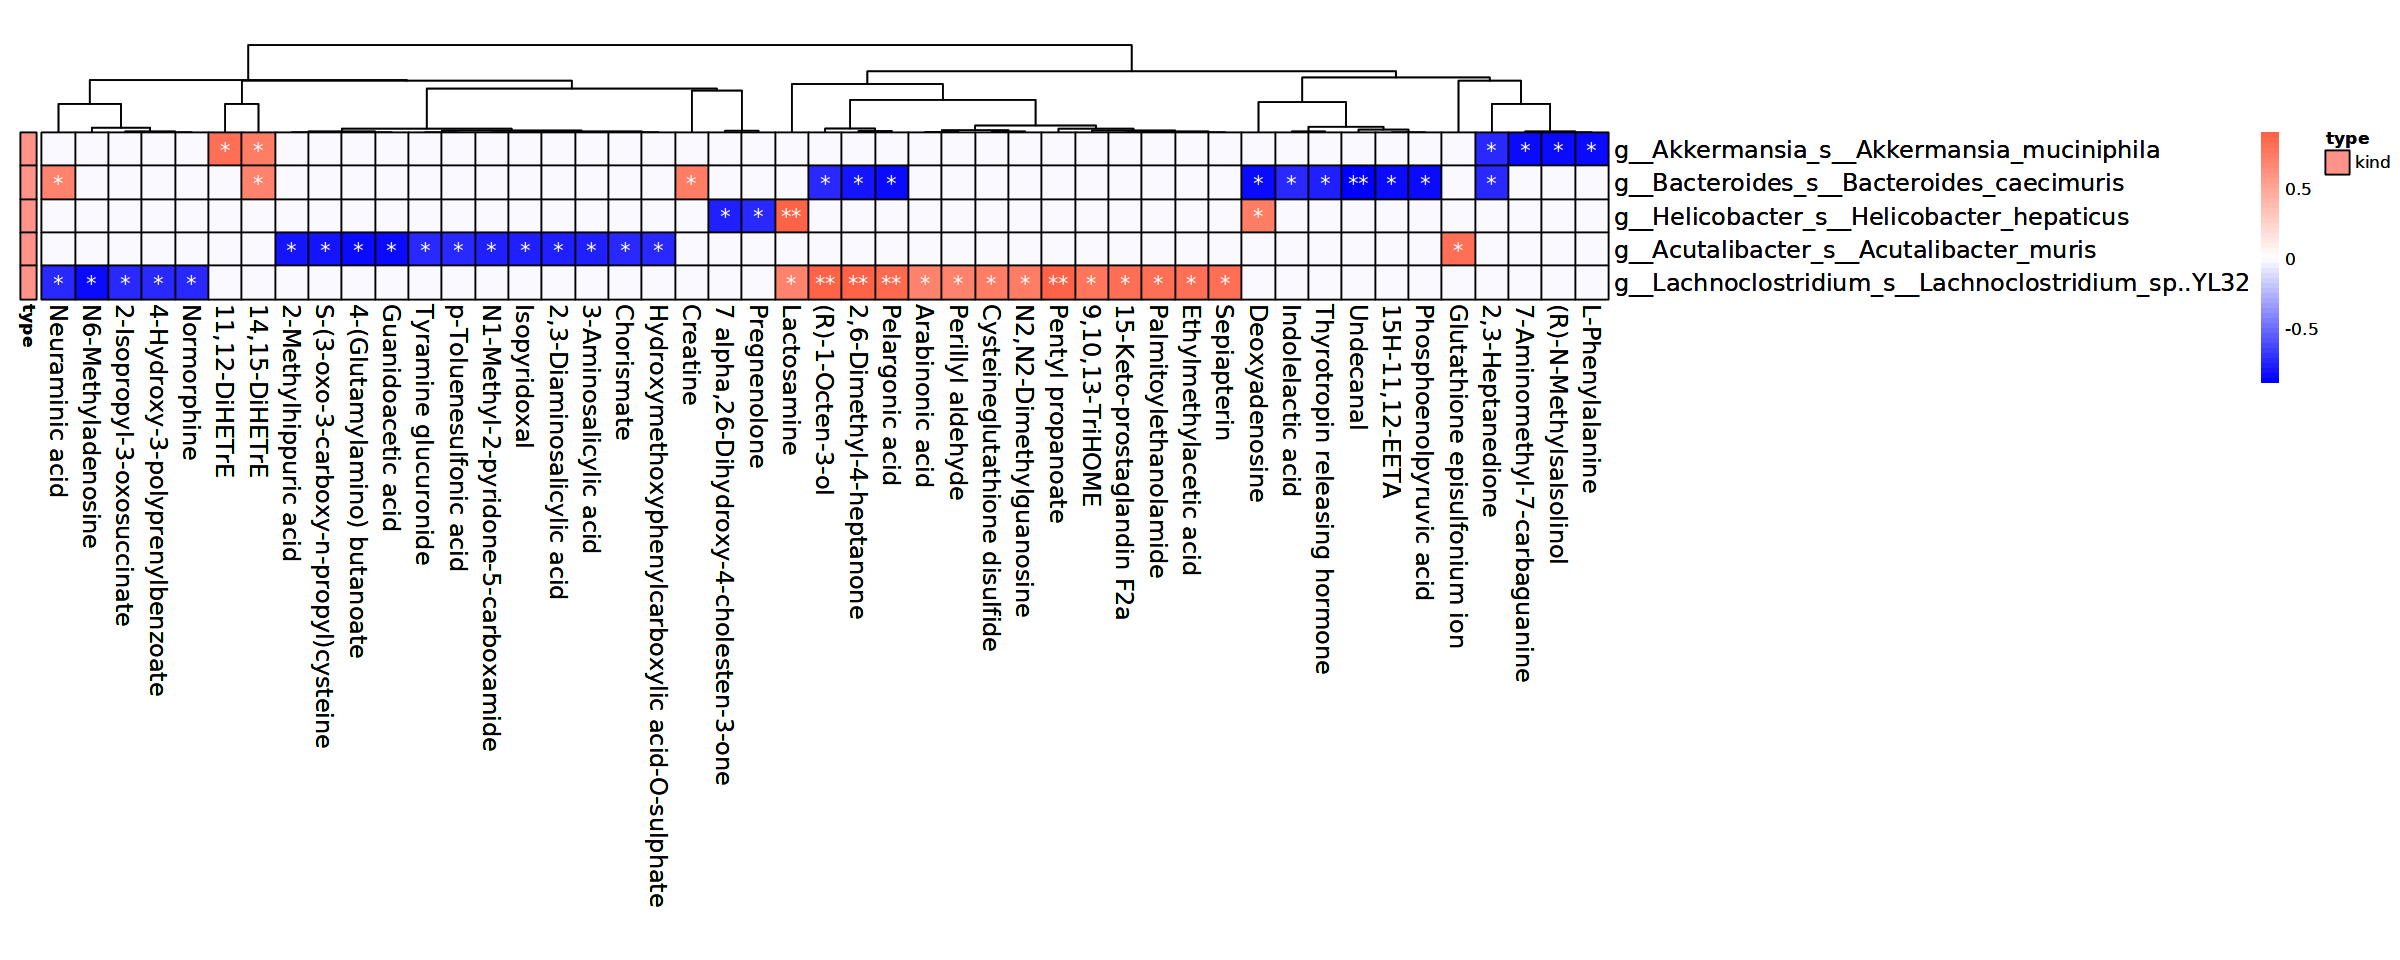

In [165]:
dd = as.data.frame(c(kind))
dd$type = c(rep('kind',5))
dd = dd %>% tibble::column_to_rownames(.,'c(kind)')
cmt2 = cmt[1:5,]
pmt2= pmt[1:5,]
cmt1 = cmt2[,colSums(cmt2 == 0) < nrow(cmt2)]
pmt1 = pmt2[,colnames(cmt1)]
 mycol<-colorRampPalette(c("blue","white","tomato"))(50)
    options(repr.plot.height = 8,repr.plot.width = 20)
    p = pheatmap(cmt1,scale = "none",cluster_row = F, cluster_col = T, border='black',
    display_numbers = pmt1,fontsize_number = 12, number_color = "white", fontsize_row = 14,  fontsize_col = 14, 
    cellwidth = 20, cellheight =20,color=mycol, annotation_row = dd)
    
    print(p)

In [149]:
pdf('koclpvswtclp-diffout-diffmetabolites-kind.pdf',height = 6,width = 20)
print(p)
dev.off()

png 
  2

In [170]:
diffmetebolit_vip1.5 = as.data.frame(colnames(cmt1))

In [171]:
write.csv(diffmetebolit_vip1.5,file = 'diffmetebolit_vip1.5.bad.csv')

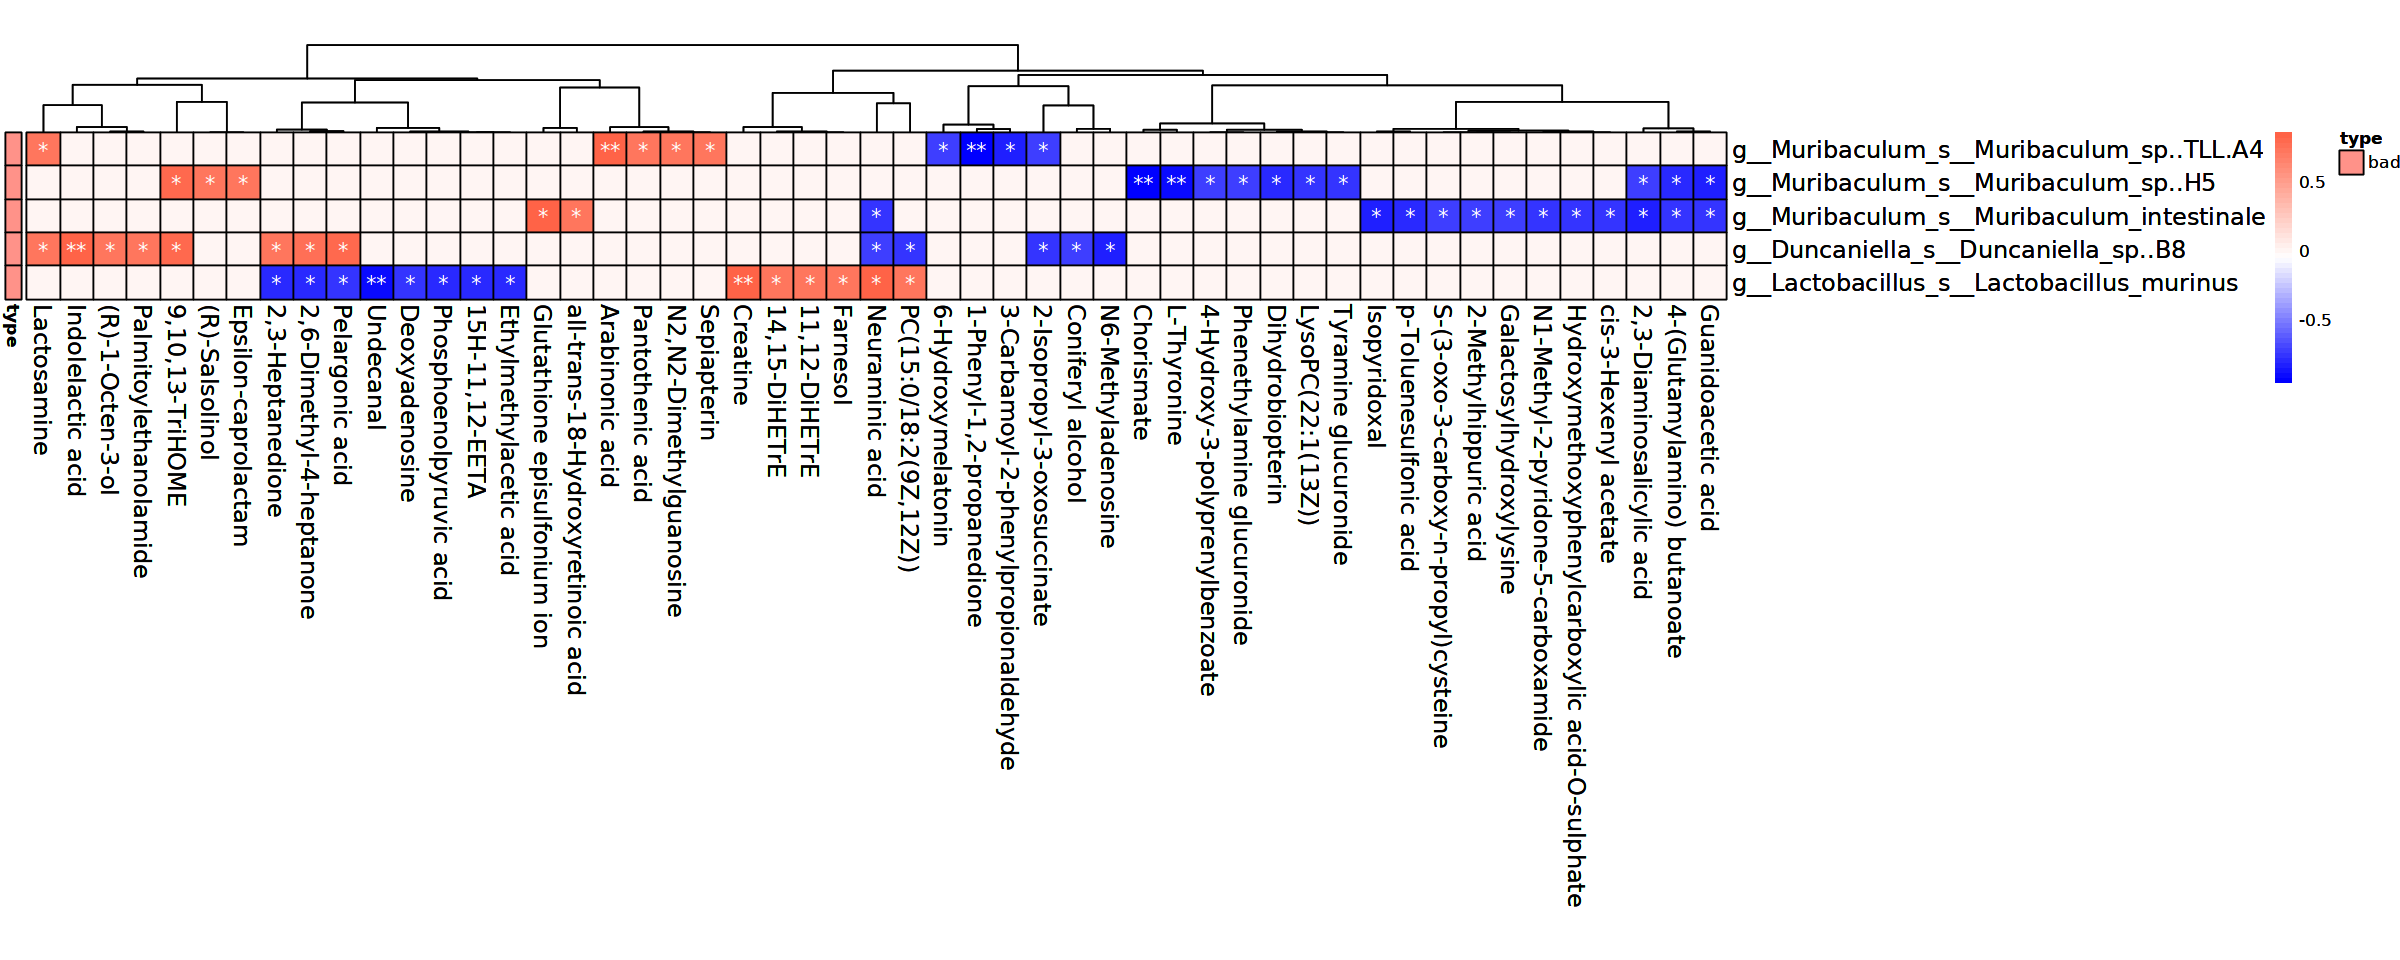

In [169]:
dd = as.data.frame(c(bad))
dd$type = c(rep('bad',5))
dd = dd %>% tibble::column_to_rownames(.,'c(bad)')
cmt2 = cmt[6:10,]
pmt2= pmt[6:10,]
cmt1 = cmt2[,colSums(cmt2 == 0) < nrow(cmt2)]
pmt1 = pmt2[,colnames(cmt1)]
 mycol<-colorRampPalette(c("blue","white","tomato"))(50)
    options(repr.plot.height = 8,repr.plot.width = 20)
    p = pheatmap(cmt1,scale = "none",cluster_row = F, cluster_col = T, border='black',
    display_numbers = pmt1,fontsize_number = 12, number_color = "white", fontsize_row = 14,  fontsize_col = 14, 
    cellwidth = 20, cellheight =20,color=mycol, annotation_row = dd)
    
    print(p)

In [153]:
pdf('koclpvswtclp-diffout-diffmetabolites-bad.pdf',height = 7,width = 25)
print(p)
dev.off()

png 
  2